<h1> NEPy LIBRARY DEMO: $frida$ </h1>

<div style='float: right'>
<img style='width: 150px' src="https://mark.trademarkia.com/logo-images/neuroelectrics-barcelona/ne-neuroelectrics-79161762.jpg"> </img>
</div>

Neuroelectrics Corporation  
Created November 2018  
Modified: -


<h3> CONTENTS </h3>

1. Description
2. Set up  
3. Get help
4. Start with Frida
5. Visualize Data
6. Perform a QC
7. Preprocess the data
8. Check results


---

<h3> 1. Description </h3>

This is **Frida**, a module to manage `.easy`, `.easy.gz`, `.nedf` and `.info` files and processing pipelines. The main class contained in Frida is `capsule`, an object which contains data from a Neuroelectrics EEG datafile (`.easy`/`.easy.gz`/`.nedf` and their respective `.info`, if availabe) and loads other information regarding the recording, such as the sampling frequency, electrode list, or the recording date. Then a `frida` object provides methods to create a `capsule`, perform data Quality Checks (QC) and run processing pipelines.

<h3> 2. Set up </h3>

When runnign the next cell, three input boxes are going to appear asking for the necessary data to set up:

- Your name or ID. Example: `MyName`

- The path where you have stored the NEpy repository. Copy paste the path into that box. Example: `C:\Users\MyUser\Documents\Git\NEpy_v0.1`.  

- The path where you have stored the file(s) you want to read (`.easy`, `.easy.gz`, `.info`). Example: `C:\Users\MyUser\Documents\Git\NEpy_v0.1\sampledata`  

If the input paths are correct, then the cell will print at the end the files in the `Data path`. When running the following cell, you will be asked to copy-paste the name of the file you want to visualize / process.

In [2]:
author = input('\033[1mUser name:\033[0m \n')
nepypath = input('\033[1mNEpy repository path:\033[0m \n ')
datapath = input('\033[1mData path:\033[0m \n ')

import sys
import os
import time
sys.path.append(nepypath)
from nepy.frida.frida import Frida
print('\n')
%load_ext autoreload
%autoreload 2
print("______________________________________________")
print ("\nNotebook started:", time.strftime("%Y-%m-%d %H:%M"))
print("\nData located in this folder:",'\033[93m', datapath, '\033[0m')
os.listdir(datapath)

User name: 
Roser
NEpy repository path: 
 C:\Users\roser.sanchez\Documents\Git\NEpy_v0.1
Data path: 
 C:\Users\roser.sanchez\Documents\Git\NEpy_v0.1\sampledata


______________________________________________

Notebook started: 2019-04-15 15:56

Data located in this folder:  C:\Users\roser.sanchez\Documents\Git\NEpy_v0.1\sampledata 


['20170807135459_W012_V1_EYC.easy.gz']

In [3]:
filename = input('\033[1mCopy paste the file you want to read (.easy / .easy.gz / .nedf):\033[0m \n')
filepath = os.path.join(datapath,filename)

Copy paste the file you want to read (.easy / .easy.gz / .nedf): 
20170807135459_W012_V1_EYC.easy.gz


---

<h3> 3. Get help </h3>

Don't know how to deal with `frida`? No worries, **ask for help!** 

The help function (similar to MATLAB) will print a description, an exaple of use and the main methods of the `frida` object

In [4]:
help(Frida)

Help on class Frida in module nepy.frida.frida:

class Frida(builtins.object)
 |  Overview:
 |  Frida is a class that contains
 |      - a Capsule object containing all necessary information taken from the .easy and .info file,
 |      - functions to visualize the raw and preprocessed data (EEG and PSDs,
 |      - functions to perform a report of the quality of the data and
 |      - functions to preprocess the data.
 |  
 |  Attributes:
 |        c:     Capsule object (for more information check the Capsule Docstring
 |        log: log containing all the preprocessing steps
 |        eeg: processed eeg
 |        eeg_original: original capsule eeg
 |        offsets: offset array of the signal
 |        sigmas: stds of the signals
 |        PSD: dictionary with PSD info
 |        bad_chan: channel flags related to channel threshold
 |        bad_records: bad epochs informaition dictionary
 |        param: Directory with all necessary parameters to perform the quality check (QC).
 |     

---

<h3> 4. Start with Frida </h3>

Now that we have read all the information above and we are experts with frida objects, let's create one!  
**Keep in mind**: It doesn't matter if we don't have the `.info` file associated to the data file. The system is ready to read and store the data anyway. 

`Frida` is a preprocessing toolbox, that means it needs some parameters to check and preprocess the data. To keep it simple you can use the default parameters and create a `Frida` object using this line: `f = Frida(filepath, author)`.  

The default parameters are the following (you can see their description using the `help` function above):  

---

```
f.param = {
            'signal_offset_limit': 1.,
            'signal_std_limit': 15.,   
            'epoch_length': 10.,
            'epoch_amp_threshold': 75.,
            'epoch_std_threshold': 30.,
            'detrend_time': 10.,
            'line_freq': 50.,
            'Q_notch': 30.,
            'low_cutoff_freq': 2.,
            'high_cutoff_freq': 45.,
            'order': 5,
            'reference_electrodes': ['Cz']
}

```

---


Let's imagine you are in **Boston** and you want to remove the power line frequency to `60 Hz`. You will need to define a new directory of `parameters`, and use it as input to the `Frida` object, like the following:

In [5]:
parameters = {
    'signal_offset_limit': 1.,
    'signal_std_limit': 15.,   
    'epoch_length': 10.,
    'epoch_amp_threshold': 75.,
    'epoch_std_threshold': 30.,
    'detrend_time': 10.,
    'line_freq': 60.,
    'Q_notch': 30.,
    'low_cutoff_freq': 2.,
    'high_cutoff_freq': 45.,
    'order': 5,
    'reference_electrodes': ['Cz']
}

f = Frida(filepath, author, parameters)

Found the file: C:\Users\roser.sanchez\Documents\Git\NEpy_v0.1\sampledata\20170807135459_W012_V1_EYC.easy.gz
Initializing in file path:   C:\Users\roser.sanchez\Documents\Git\NEpy_v0.1\sampledata\20170807135459_W012_V1_EYC.easy.gz
Processing:  20170807135459_W012_V1_EYC
Filenameroot:  C:\Users\roser.sanchez\Documents\Git\NEpy_v0.1\sampledata\20170807135459_W012_V1_EYC
Extension:  easy.gz
 
_______________________________________________________________
Reading info file ...
 Warning! .info file not found! Using standard values... 
Reading  C:\Users\roser.sanchez\Documents\Git\NEpy_v0.1\sampledata\20170807135459_W012_V1_EYC.easy.gz to get numchannels....

numchannels ....... 32
_______________________________________________________________
Reading: 20170807135459_W012_V1_EYC . easy.gz 
 
Number of channels detected: 32
First sample recorded : 2017-08-07 19:54:50 

 L0 raw data data in uV
                 Ch1            Ch2            Ch3            Ch4  \
count  180000.000000  180000.0

In [6]:
f.c.listAttributes()

- author :
 Roser 


- basename :
 20170807135459_W012_V1_EYC 


- capsuledate :
 2019-04-15 15:56 


- eegstartdate :
 2017-08-07 19:54:50 


- electrodes :
 ['Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5', 'Ch6', 'Ch7', 'Ch8', 'Ch9', 'Ch10', 'Ch11', 'Ch12', 'Ch13', 'Ch14', 'Ch15', 'Ch16', 'Ch17', 'Ch18', 'Ch19', 'Ch20', 'Ch21', 'Ch22', 'Ch23', 'Ch24', 'Ch25', 'Ch26', 'Ch27', 'Ch28', 'Ch29', 'Ch30', 'Ch31', 'Ch32'] 


- filenameroot :
 C:\Users\roser.sanchez\Documents\Git\NEpy_v0.1\sampledata\20170807135459_W012_V1_EYC 


- filepath :
 C:\Users\roser.sanchez\Documents\Git\NEpy_v0.1\sampledata\20170807135459_W012_V1_EYC.easy.gz 


- fs :
 500.0 


- good_init :
 True 


- np_acc :
 [[    0.     0.     0.]
 [    0.     0.     0.]
 [    0.     0.     0.]
 ...
 [    0.  8796. -2706.]
 [    0.  8796. -2706.]
 [    0.  8796. -2706.]] 


- np_eeg :
 [[ 5698.347  9774.686 14357.377 ...  3816.652 10282.374  2085.161]
 [ 5706.549  9787.703 14372.541 ...  3827.381 10299.969  2095.318]
 [ 5725.813  9811.545 1

---

<h3> 5. Visualize Data </h3>

`Frida` has two main functions to visualize the data and its PSDs. You can play with `plotEEG()` function using its parameters: `spacing`, `fixlim` and `xlim` (Check its Docsting):

Plotting EEG channels after this pipeline:
1 . Object created: 2019-04-15 15:56

File:  C:\Users\roser.sanchez\Documents\Git\NEpy_v0.1\sampledata\20170807135459_W012_V1_EYC.easy.gz


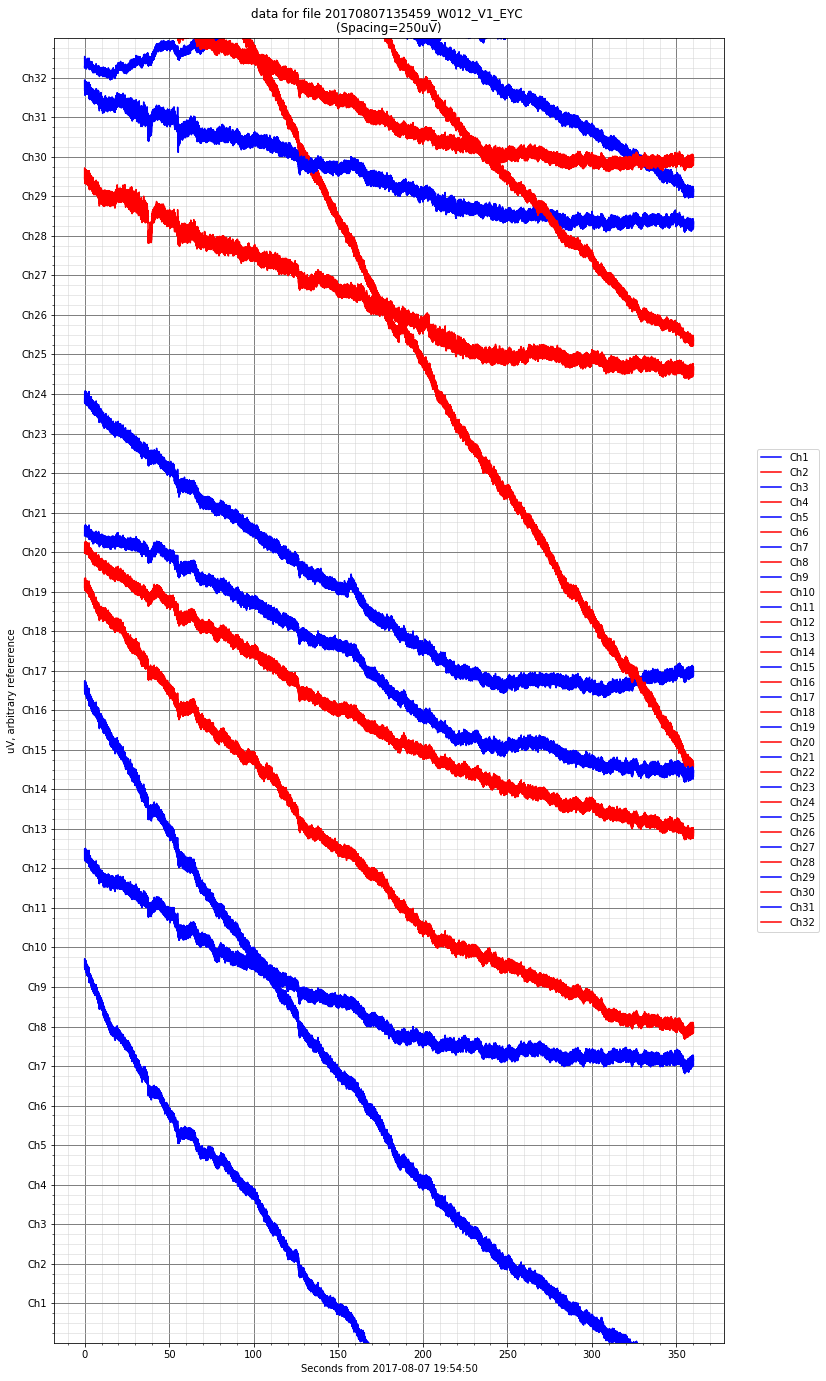

In [7]:
f.plotEEG()

Plotting PSDs after this pipeline:
1 . Object created: 2019-04-15 15:56

File:  C:\Users\roser.sanchez\Documents\Git\NEpy_v0.1\sampledata\20170807135459_W012_V1_EYC

Channel 1: Ch1, STD= 572.3 uV


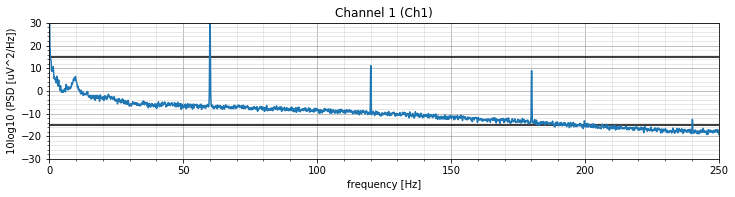


Channel 2: Ch2, STD=1907.5 uV


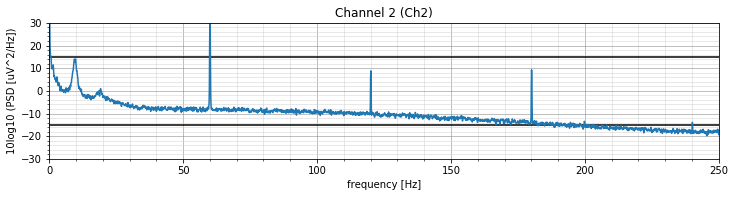


Channel 3: Ch3, STD= 759.7 uV


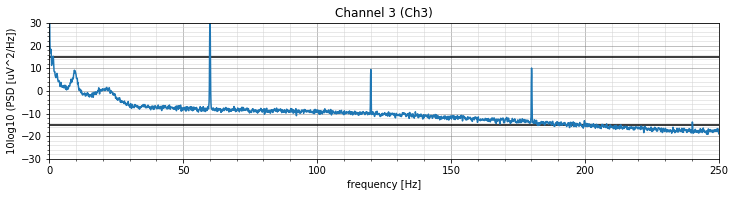


Channel 4: Ch4, STD= 182.5 uV


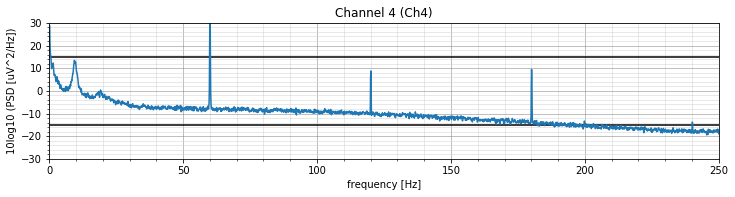


Channel 5: Ch5, STD= 381.8 uV


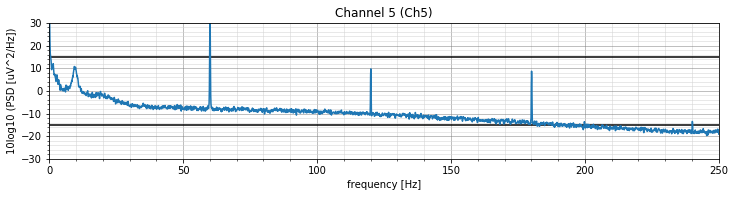


Channel 6: Ch6, STD= 187.2 uV


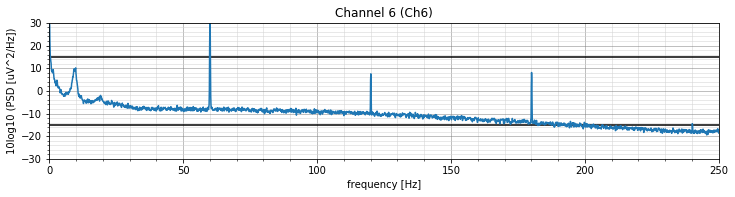


Channel 7: Ch7, STD= 263.2 uV


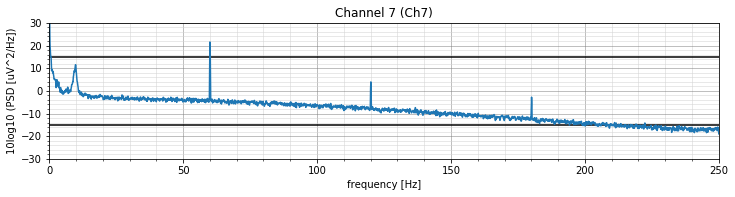


Channel 8: Ch8, STD= 534.2 uV


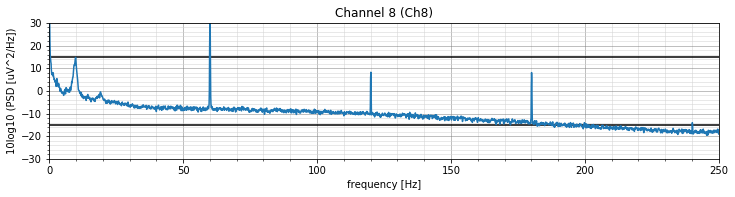


Channel 9: Ch9, STD= 192.4 uV


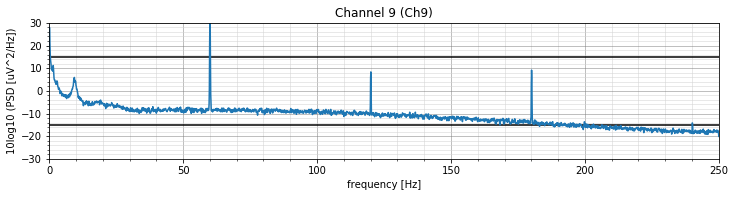


Channel 10: Ch10, STD= 440.0 uV


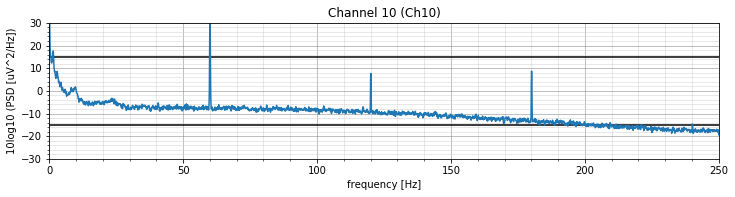


Channel 11: Ch11, STD= 738.4 uV


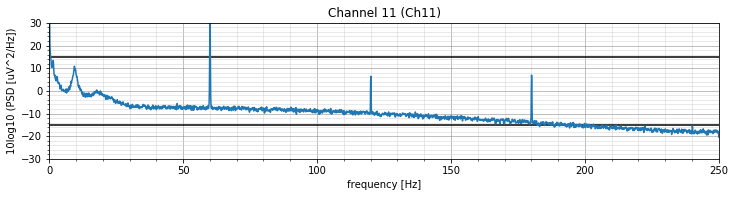


Channel 12: Ch12, STD= 221.9 uV


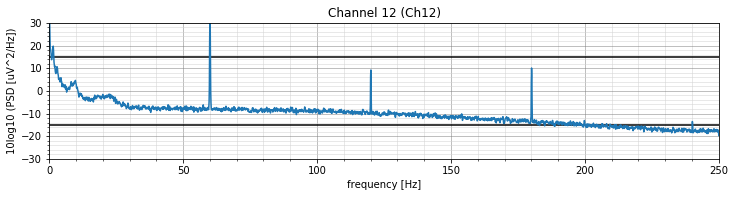


Channel 13: Ch13, STD= 489.5 uV


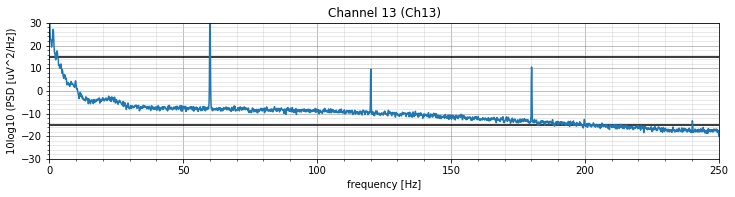


Channel 14: Ch14, STD= 372.5 uV


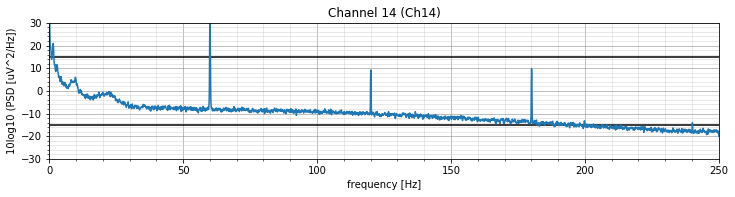


Channel 15: Ch15, STD=1280.5 uV


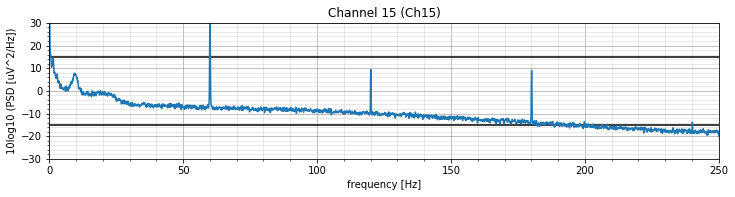


Channel 16: Ch16, STD= 503.9 uV


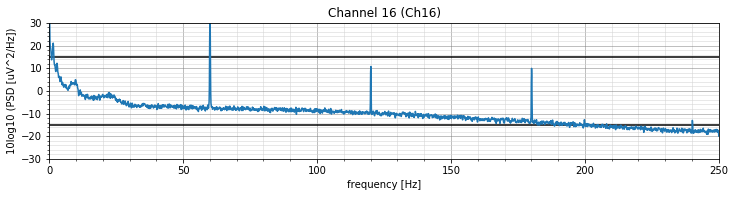


Channel 17: Ch17, STD= 544.2 uV


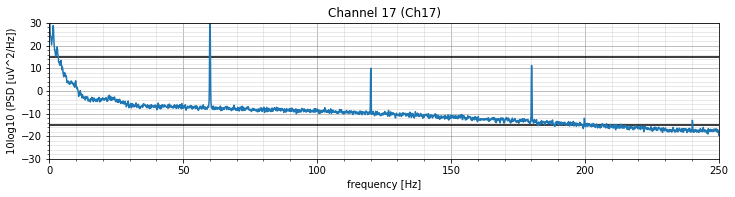


Channel 18: Ch18, STD= 382.4 uV


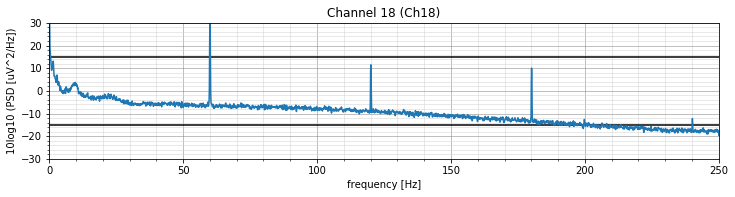


Channel 19: Ch19, STD= 263.6 uV


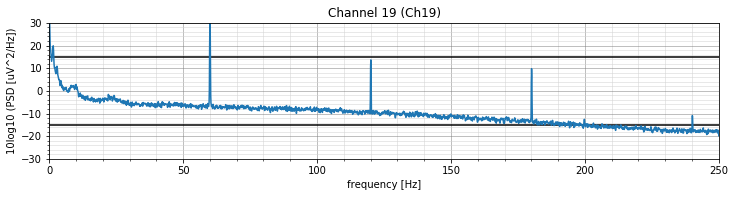


Channel 20: Ch20, STD= 296.7 uV


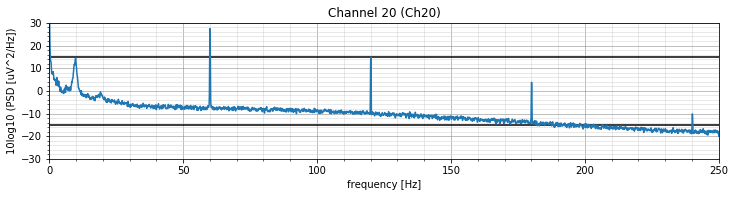


Channel 21: Ch21, STD= 521.2 uV


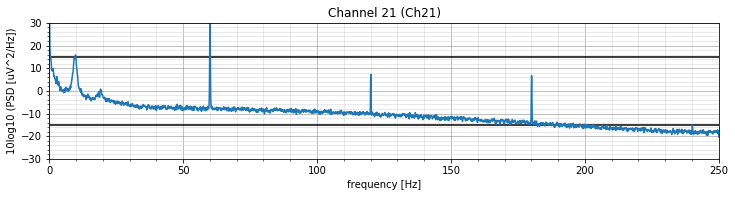


Channel 22: Ch22, STD= 758.4 uV


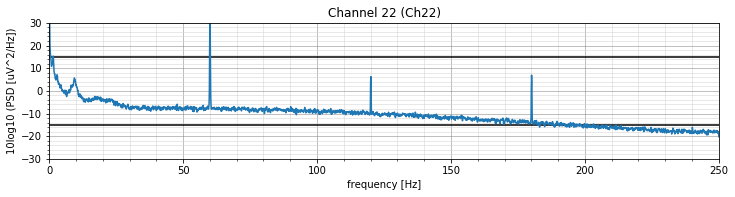


Channel 23: Ch23, STD= 657.6 uV


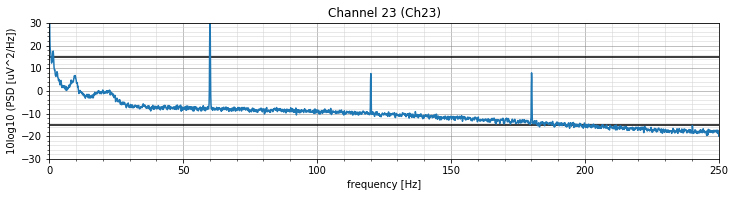


Channel 24: Ch24, STD= 570.0 uV


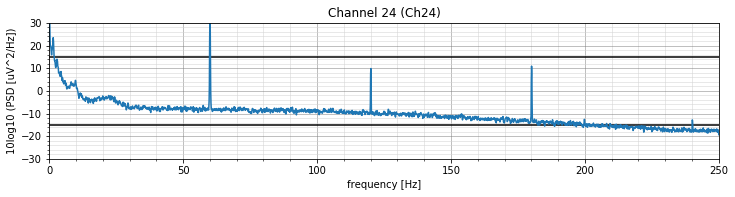


Channel 25: Ch25, STD=1130.8 uV


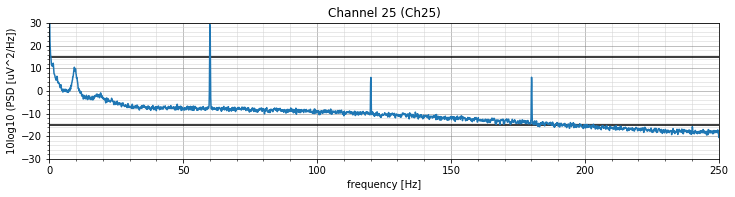


Channel 26: Ch26, STD= 773.2 uV


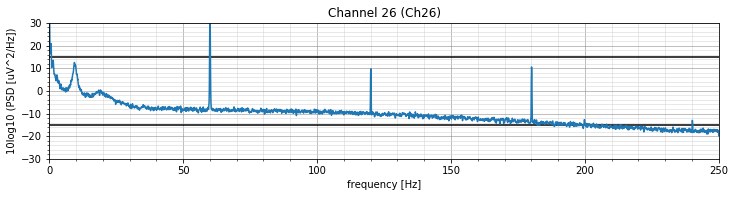


Channel 27: Ch27, STD= 456.3 uV


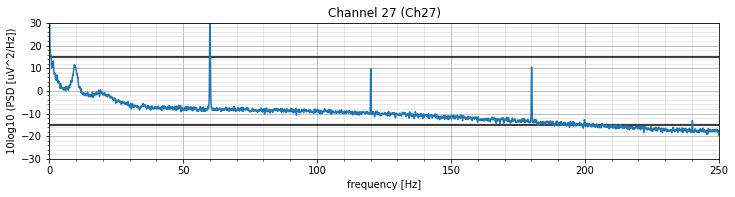


Channel 28: Ch28, STD= 835.7 uV


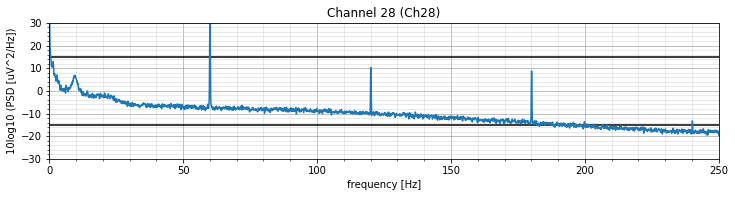


Channel 29: Ch29, STD= 689.0 uV


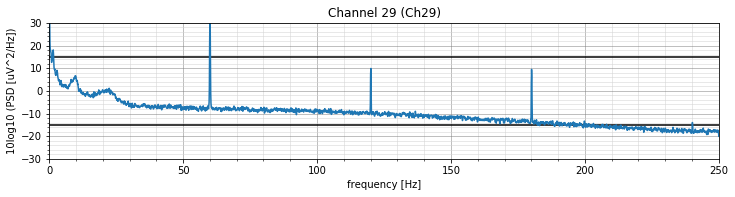


Channel 30: Ch30, STD=1501.9 uV


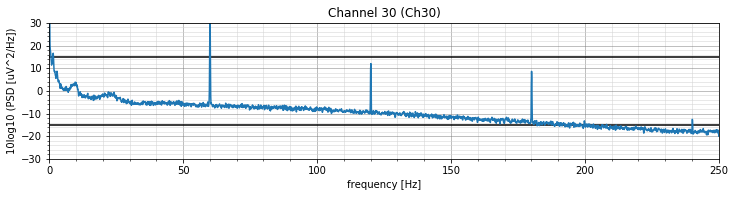


Channel 31: Ch31, STD= 361.5 uV


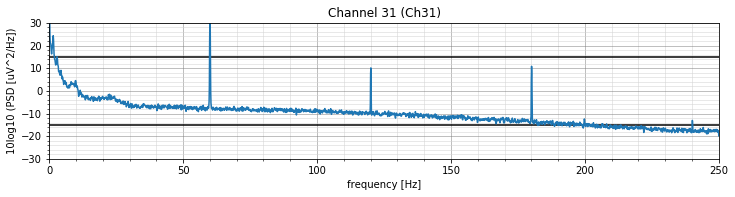


Channel 32: Ch32, STD= 252.7 uV


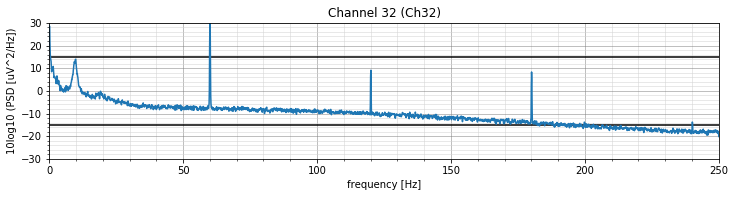

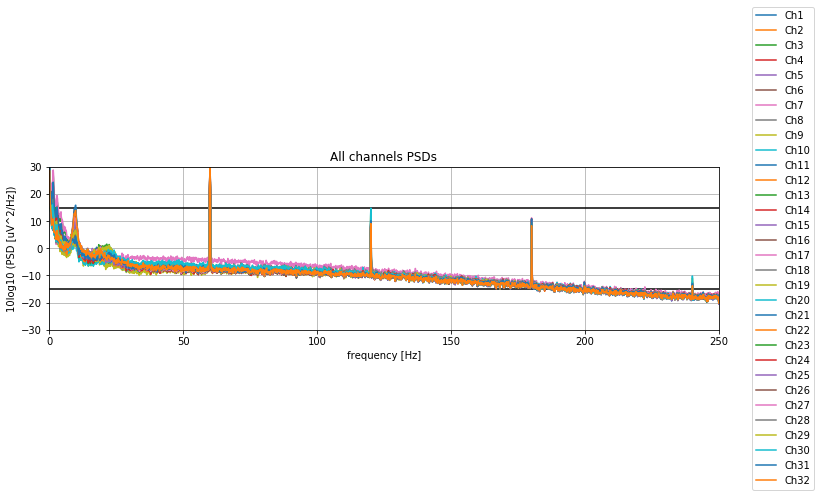

In [8]:
f.plotPSD()

---

<h3> 6. Perform a QC </h3>

With the example above, you can already see that the raw data is not really clean nor ready to perform any study and process it. But, in case of doubts or for any specific requirement, `Frida` has a Quality Check funciton (QC) that marks the channels that are above any quality threshold that you can specify in the `parameter` input (see `help(Frida)` for more information).


--------QUALITY CHECK--------
Current log is:
['Object created: 2019-04-15 15:56']

Checking Quality of data with epoch length of  10.0  seconds.
Offset limit:  1.0
STD limit:  15.0
Channel Ch1   : Offset =    4.5 mV(*) / STD =  572.2 uV (*)
Channel Ch2   : Offset =    6.2 mV(*) / STD = 1907.4 uV (*)
Channel Ch3   : Offset =   13.0 mV(*) / STD =  759.7 uV (*)
Channel Ch4   : Offset =   -3.6 mV(*) / STD =  182.5 uV (*)
Channel Ch5   : Offset =    0.9 mV    / STD =  381.8 uV (*)
Channel Ch6   : Offset =   -8.4 mV(*) / STD =  187.2 uV (*)
Channel Ch7   : Offset =    6.7 mV(*) / STD =  263.2 uV (*)
Channel Ch8   : Offset =    1.9 mV(*) / STD =  534.2 uV (*)
Channel Ch9   : Offset =   -6.8 mV(*) / STD =  192.4 uV (*)
Channel Ch10  : Offset =    7.3 mV(*) / STD =  440.0 uV (*)
Channel Ch11  : Offset =    5.7 mV(*) / STD =  738.4 uV (*)
Channel Ch12  : Offset =    7.4 mV(*) / STD =  221.9 uV (*)
Channel Ch13  : Offset =    6.2 mV(*) / STD =  489.5 uV (*)
Channel Ch14  : Offset =    3.1 mV(*)

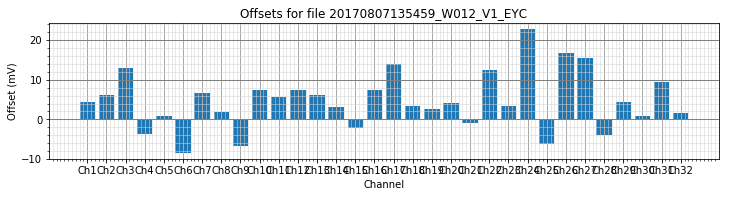

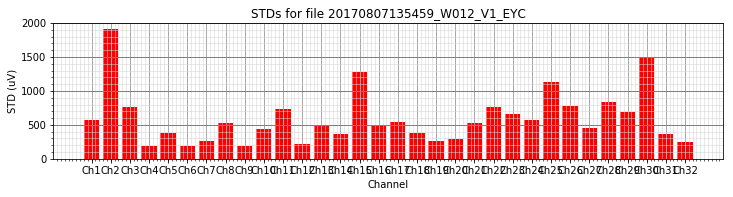

Minutes of data: 6.0
Max epochs per channel:  35

-Epoch Amplitude threshold:  75.0
-Epoch STD threshold:  30.0 

Found 200 bad channel-epochs out of 1120, or 17.9%.
                

Bad channel-epochs per channel:
channel 0   /   Ch1, N= 2    (or 0.2%)
channel 1   /   Ch2, N= 5    (or 0.4%)
channel 2   /   Ch3, N= 4    (or 0.4%)
channel 3   /   Ch4, N= 2    (or 0.2%)
channel 4   /   Ch5, N= 2    (or 0.2%)
channel 5   /   Ch6, N= 3    (or 0.3%)
channel 6   /   Ch7, N= 2    (or 0.2%)
channel 7   /   Ch8, N= 2    (or 0.2%)
channel 8   /   Ch9, N= 1    (or 0.1%)
channel 9   /  Ch10, N= 6    (or 0.5%)
channel 10  /  Ch11, N= 4    (or 0.4%)
channel 11  /  Ch12, N= 6    (or 0.5%)
channel 12  /  Ch13, N= 24   (or 2.1%)
channel 13  /  Ch14, N= 13   (or 1.2%)
channel 14  /  Ch15, N= 5    (or 0.4%)
channel 15  /  Ch16, N= 9    (or 0.8%)
channel 16  /  Ch17, N= 25   (or 2.2%)
channel 17  /  Ch18, N= 3    (or 0.3%)
channel 18  /  Ch19, N= 5    (or 0.4%)
channel 19  /  Ch20, N= 1    (or 0.1%)
chan

In [9]:
f.QC()

---

<h3> 7. Preprocess the Data </h3>

`Frida` offers a default pipeline to pre-process raw data:
```
pipeline = ['resetEEG', 'referenceData', 'detrendData', 'notch', 'bandpassfilter']
```

It takes specific `parameters` to perform each of the steps. Please check the `help(Frida)` for more information about the available functions and the parameters descriptions.

In [10]:
f.preprocess()

---------PREPROCESSING---------
Pipeline:
['reset', 'rereference', 'detrend', 'remove_line_freq', 'bandpassfilter']
-------------------------------
Step 1 :  reset  ...
-------------------------------
 
Step 2 :  rereference  ...
Reference electrodes:  ['Cz']
Using average reference
-------------------------------
 
Step 3 :  detrend  ...
Every  10.0  seconds
-------------------------------
 
Step 4 :  remove_line_freq  ...
Power line frequency:  60.0
Notch Q-factor:  30.0
-------------------------------
 
Step 5 :  bandpassfilter  ...
Cutoff frequencies:  2.0 - 45.0
-------------------------------
 
Done: Updated Log:  ['Object created: 2019-04-15 15:56', 'EEG reset on 2019-04-15 15:57', 'Reference to: Cz on 2019-04-15 15:57', 'Detrend data every 10.0 s on 2019-04-15 15:57', 'Notch at 60.0 with Q=30.0 on 2019-04-15 15:57', 'Filter at low_cutoff_freq= 2.0 and high_cutoff_freq=45.0 on 2019-04-15 15:57']
 


---

<h3> 8. Check the results </h3>

In order to check the results we can do either another QC or visualize the data as we have seen before:


--------QUALITY CHECK--------
Current log is:
['Object created: 2019-04-15 15:56', 'EEG reset on 2019-04-15 15:57', 'Reference to: Cz on 2019-04-15 15:57', 'Detrend data every 10.0 s on 2019-04-15 15:57', 'Notch at 60.0 with Q=30.0 on 2019-04-15 15:57', 'Filter at low_cutoff_freq= 2.0 and high_cutoff_freq=45.0 on 2019-04-15 15:57']

Checking Quality of data with epoch length of  10.0  seconds.
Offset limit:  1.0
STD limit:  15.0
Channel Ch1   : Offset =   -0.0 mV    / STD =    3.8 uV  
Channel Ch2   : Offset =    0.0 mV    / STD =    4.5 uV  
Channel Ch3   : Offset =    0.0 mV    / STD =    3.1 uV  
Channel Ch4   : Offset =    0.0 mV    / STD =    3.6 uV  
Channel Ch5   : Offset =   -0.0 mV    / STD =    3.4 uV  
Channel Ch6   : Offset =    0.0 mV    / STD =    3.9 uV  
Channel Ch7   : Offset =   -0.0 mV    / STD =    5.2 uV  
Channel Ch8   : Offset =    0.0 mV    / STD =    4.9 uV  
Channel Ch9   : Offset =   -0.0 mV    / STD =    3.0 uV  
Channel Ch10  : Offset =   -0.0 mV    / STD 

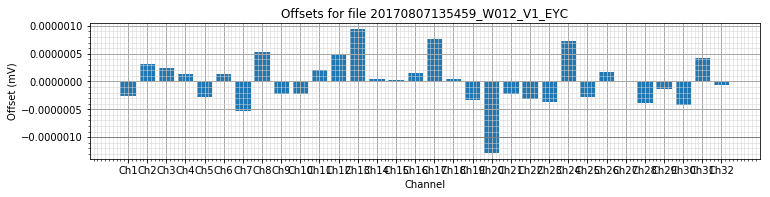

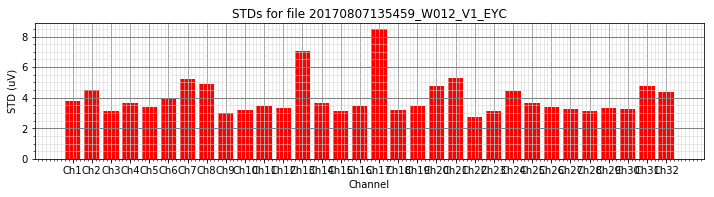

Minutes of data: 6.0
Max epochs per channel:  35

-Epoch Amplitude threshold:  75.0
-Epoch STD threshold:  30.0 

Found 4 bad channel-epochs out of 1120, or 0.4%.
                

Bad channel-epochs per channel:
channel 0   /   Ch1, N= 0    (or 0.0%)
channel 1   /   Ch2, N= 0    (or 0.0%)
channel 2   /   Ch3, N= 0    (or 0.0%)
channel 3   /   Ch4, N= 0    (or 0.0%)
channel 4   /   Ch5, N= 0    (or 0.0%)
channel 5   /   Ch6, N= 0    (or 0.0%)
channel 6   /   Ch7, N= 0    (or 0.0%)
channel 7   /   Ch8, N= 0    (or 0.0%)
channel 8   /   Ch9, N= 0    (or 0.0%)
channel 9   /  Ch10, N= 0    (or 0.0%)
channel 10  /  Ch11, N= 0    (or 0.0%)
channel 11  /  Ch12, N= 0    (or 0.0%)
channel 12  /  Ch13, N= 2    (or 0.2%)
channel 13  /  Ch14, N= 0    (or 0.0%)
channel 14  /  Ch15, N= 0    (or 0.0%)
channel 15  /  Ch16, N= 0    (or 0.0%)
channel 16  /  Ch17, N= 2    (or 0.2%)
channel 17  /  Ch18, N= 0    (or 0.0%)
channel 18  /  Ch19, N= 0    (or 0.0%)
channel 19  /  Ch20, N= 0    (or 0.0%)
channel

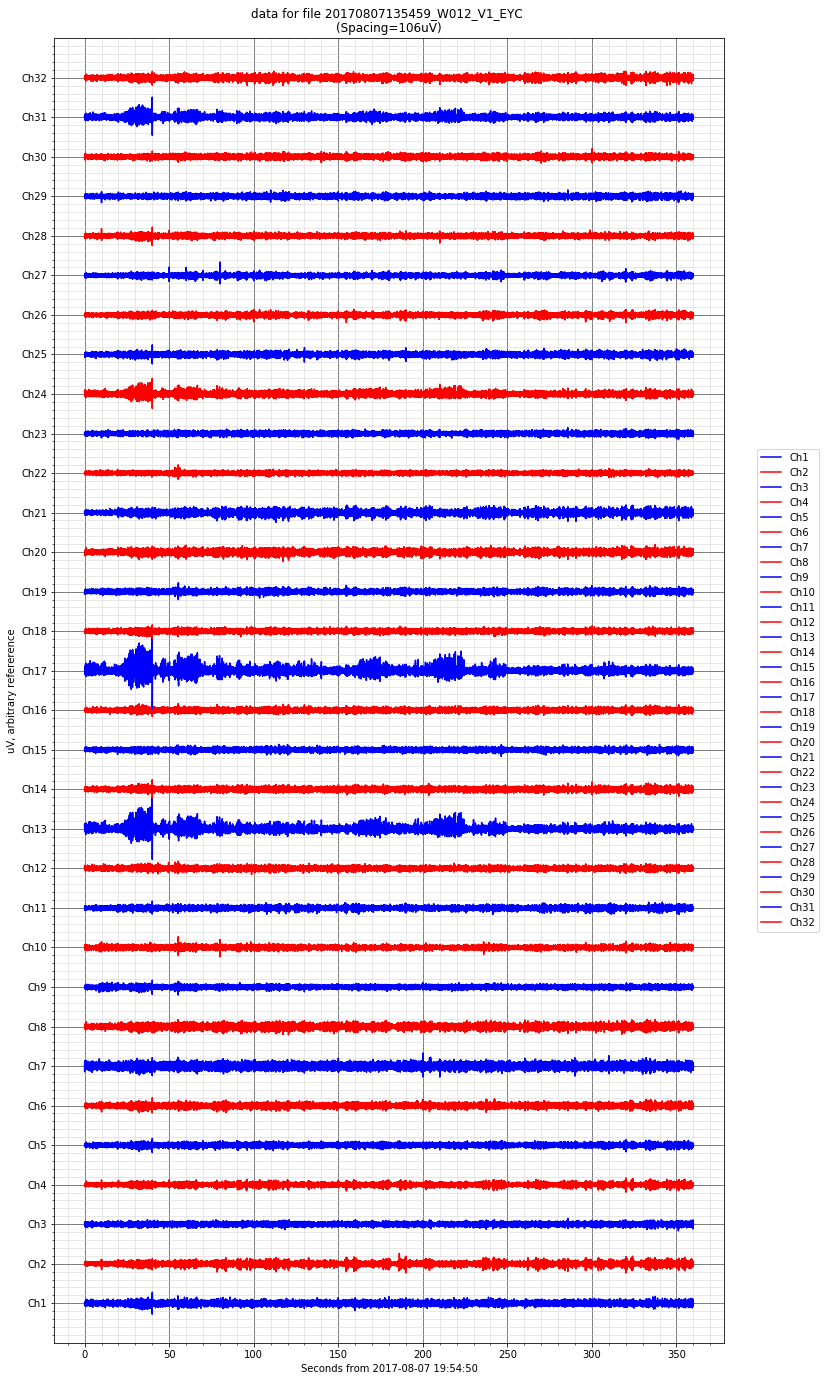

Plotting PSDs after this pipeline:
1 . Object created: 2019-04-15 15:56
2 . EEG reset on 2019-04-15 15:57
3 . Reference to: Cz on 2019-04-15 15:57
4 . Detrend data every 10.0 s on 2019-04-15 15:57
5 . Notch at 60.0 with Q=30.0 on 2019-04-15 15:57
6 . Filter at low_cutoff_freq= 2.0 and high_cutoff_freq=45.0 on 2019-04-15 15:57

File:  C:\Users\roser.sanchez\Documents\Git\NEpy_v0.1\sampledata\20170807135459_W012_V1_EYC

Channel 1: Ch1, STD=   3.8 uV


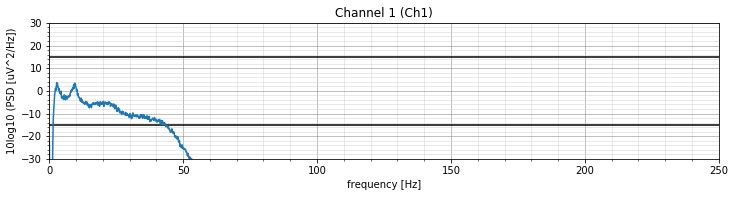


Channel 2: Ch2, STD=   4.5 uV


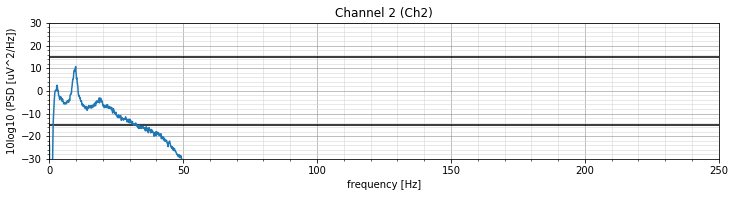


Channel 3: Ch3, STD=   3.1 uV


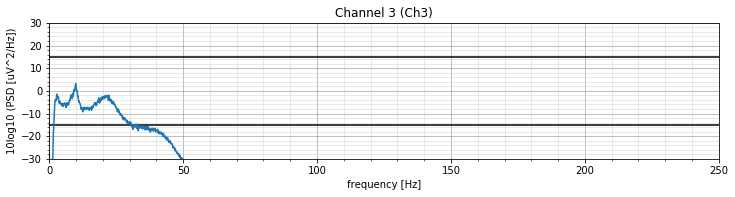


Channel 4: Ch4, STD=   3.6 uV


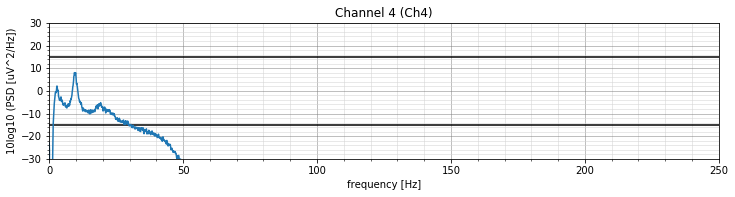


Channel 5: Ch5, STD=   3.4 uV


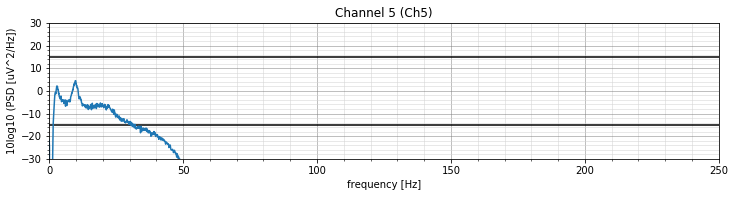


Channel 6: Ch6, STD=   3.9 uV


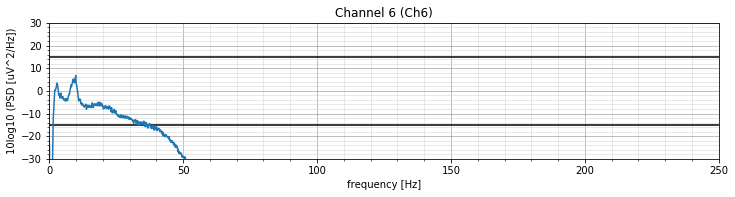


Channel 7: Ch7, STD=   5.2 uV


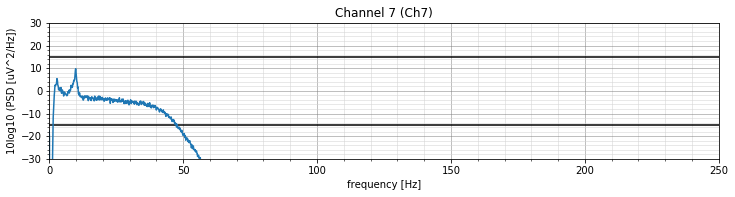


Channel 8: Ch8, STD=   4.9 uV


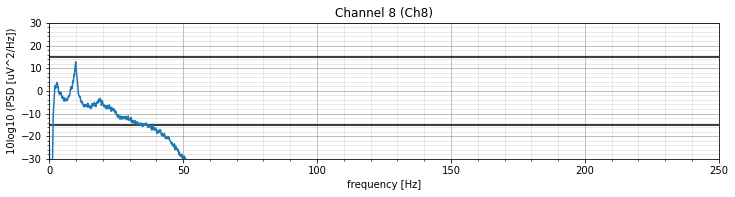


Channel 9: Ch9, STD=   3.0 uV


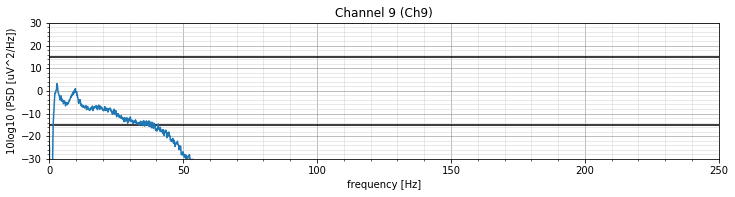


Channel 10: Ch10, STD=   3.2 uV


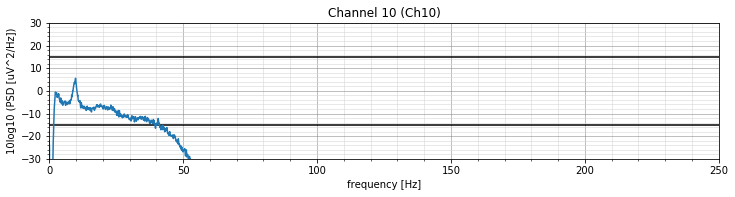


Channel 11: Ch11, STD=   3.5 uV


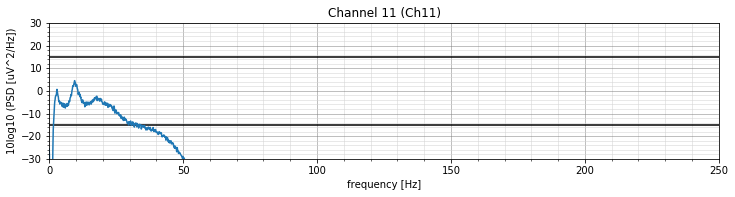


Channel 12: Ch12, STD=   3.4 uV


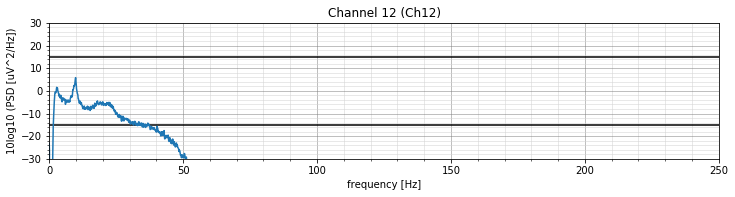


Channel 13: Ch13, STD=   7.1 uV


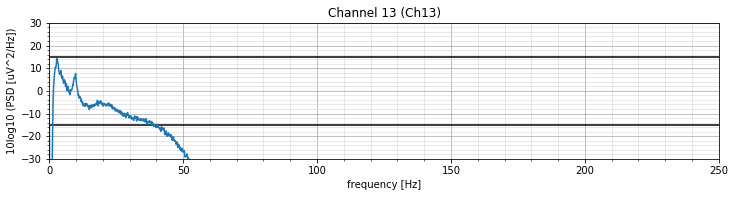


Channel 14: Ch14, STD=   3.7 uV


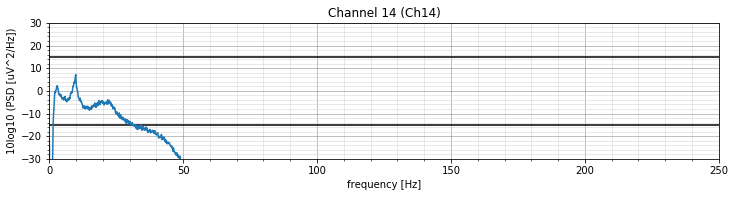


Channel 15: Ch15, STD=   3.2 uV


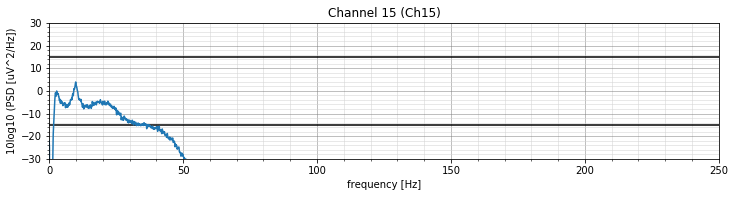


Channel 16: Ch16, STD=   3.5 uV


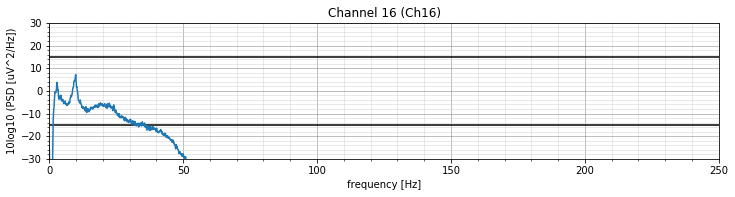


Channel 17: Ch17, STD=   8.5 uV


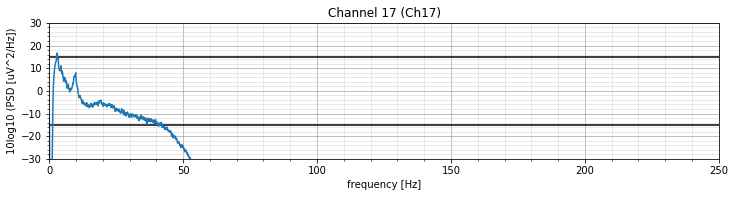


Channel 18: Ch18, STD=   3.2 uV


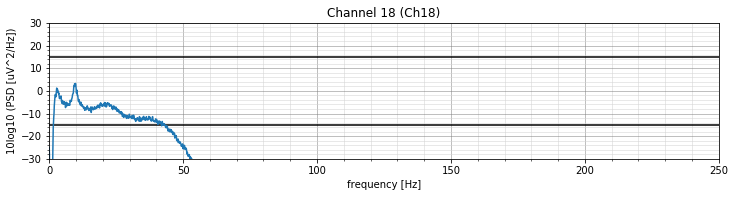


Channel 19: Ch19, STD=   3.4 uV


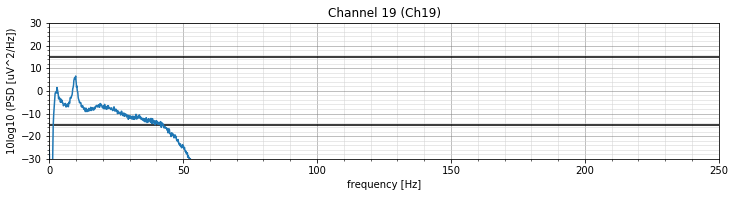


Channel 20: Ch20, STD=   4.8 uV


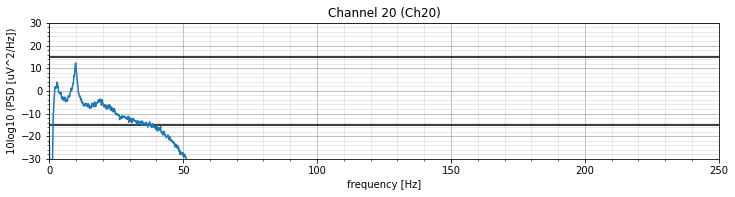


Channel 21: Ch21, STD=   5.3 uV


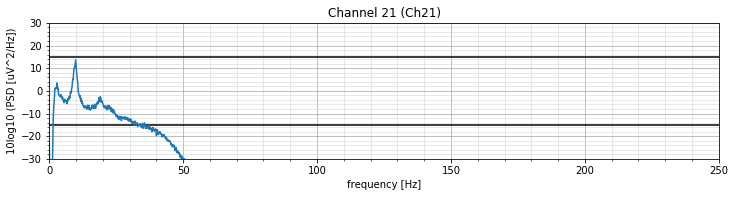


Channel 22: Ch22, STD=   2.7 uV


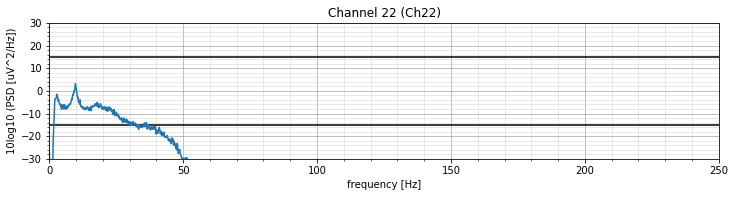


Channel 23: Ch23, STD=   3.1 uV


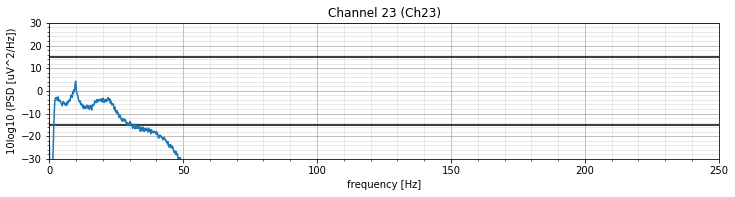


Channel 24: Ch24, STD=   4.5 uV


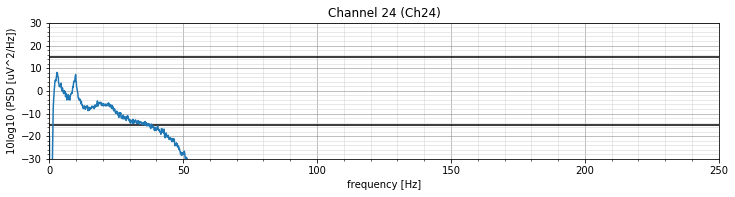


Channel 25: Ch25, STD=   3.7 uV


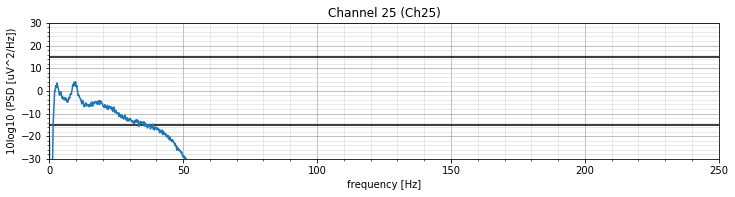


Channel 26: Ch26, STD=   3.4 uV


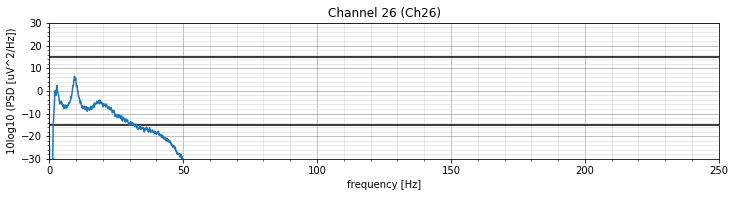


Channel 27: Ch27, STD=   3.2 uV


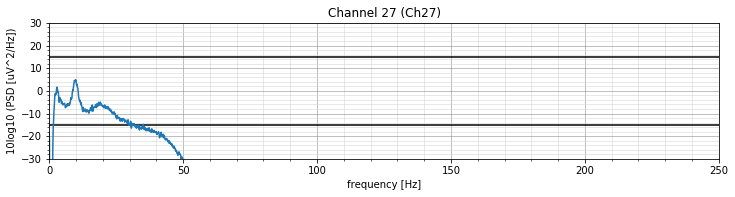


Channel 28: Ch28, STD=   3.2 uV


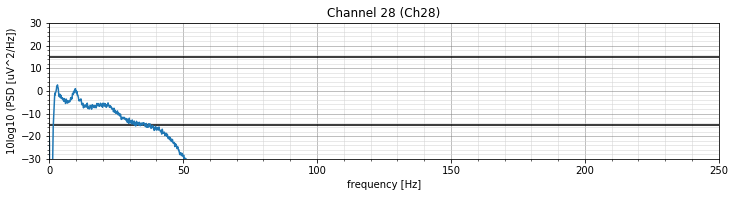


Channel 29: Ch29, STD=   3.3 uV


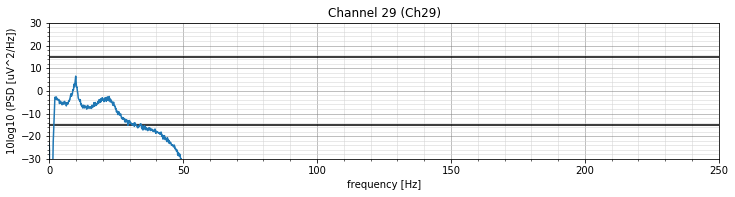


Channel 30: Ch30, STD=   3.3 uV


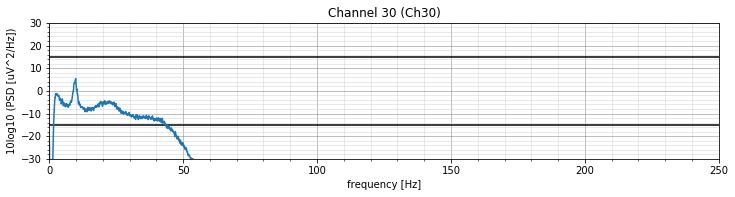


Channel 31: Ch31, STD=   4.8 uV


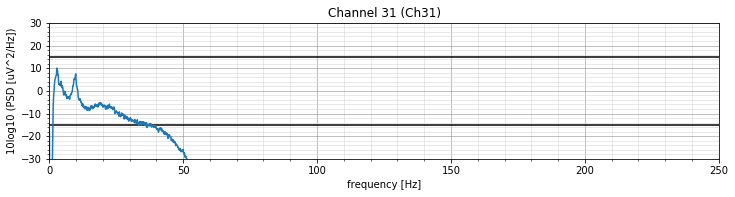


Channel 32: Ch32, STD=   4.4 uV


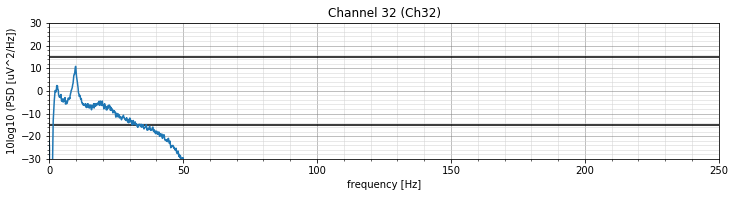

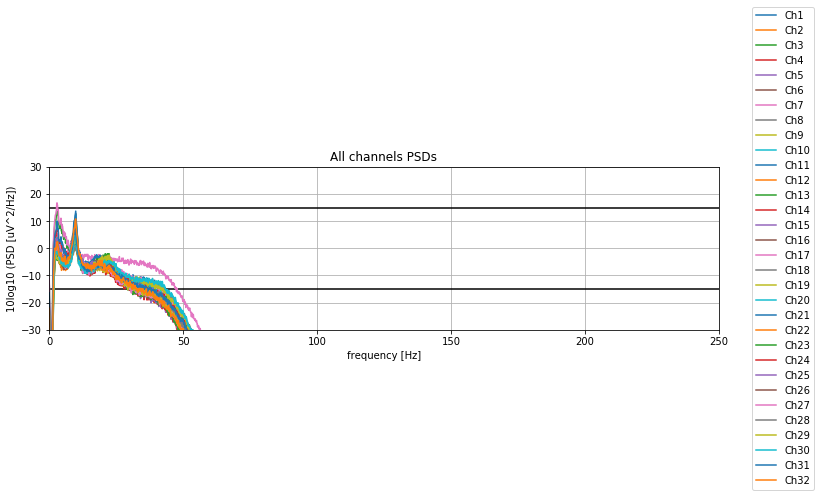

In [11]:
f.QC()
f.plotEEG()
f.plotPSD()

---


<h1>END OF $frida$ DEMO </h1>

<div style='float: right'>
<img style='width: 150px' src="https://mark.trademarkia.com/logo-images/neuroelectrics-barcelona/ne-neuroelectrics-79161762.jpg"> </img>
</div>

<h2>Thanks! I hope it was useful! </h2>
<h2>Enjoy Frida. </h2>


---

<h4> Main author: R Sanchez-Todo (roser.sanchez@neuroelectrics.com) </h4>
Contributors: are welcomed

